There exist two undirected trees with n and m nodes, numbered from 0 to n - 1 and from 0 to m - 1, respectively. You are given two 2D integer arrays edges1 and edges2 of lengths n - 1 and m - 1, respectively, where edges1[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the first tree and edges2[i] = [ui, vi] indicates that there is an edge between nodes ui and vi in the second tree.

You must connect one node from the first tree with another node from the second tree with an edge.

Return the minimum possible diameter of the resulting tree.

The diameter of a tree is the length of the longest path between any two nodes in the tree.

 

Example 1:

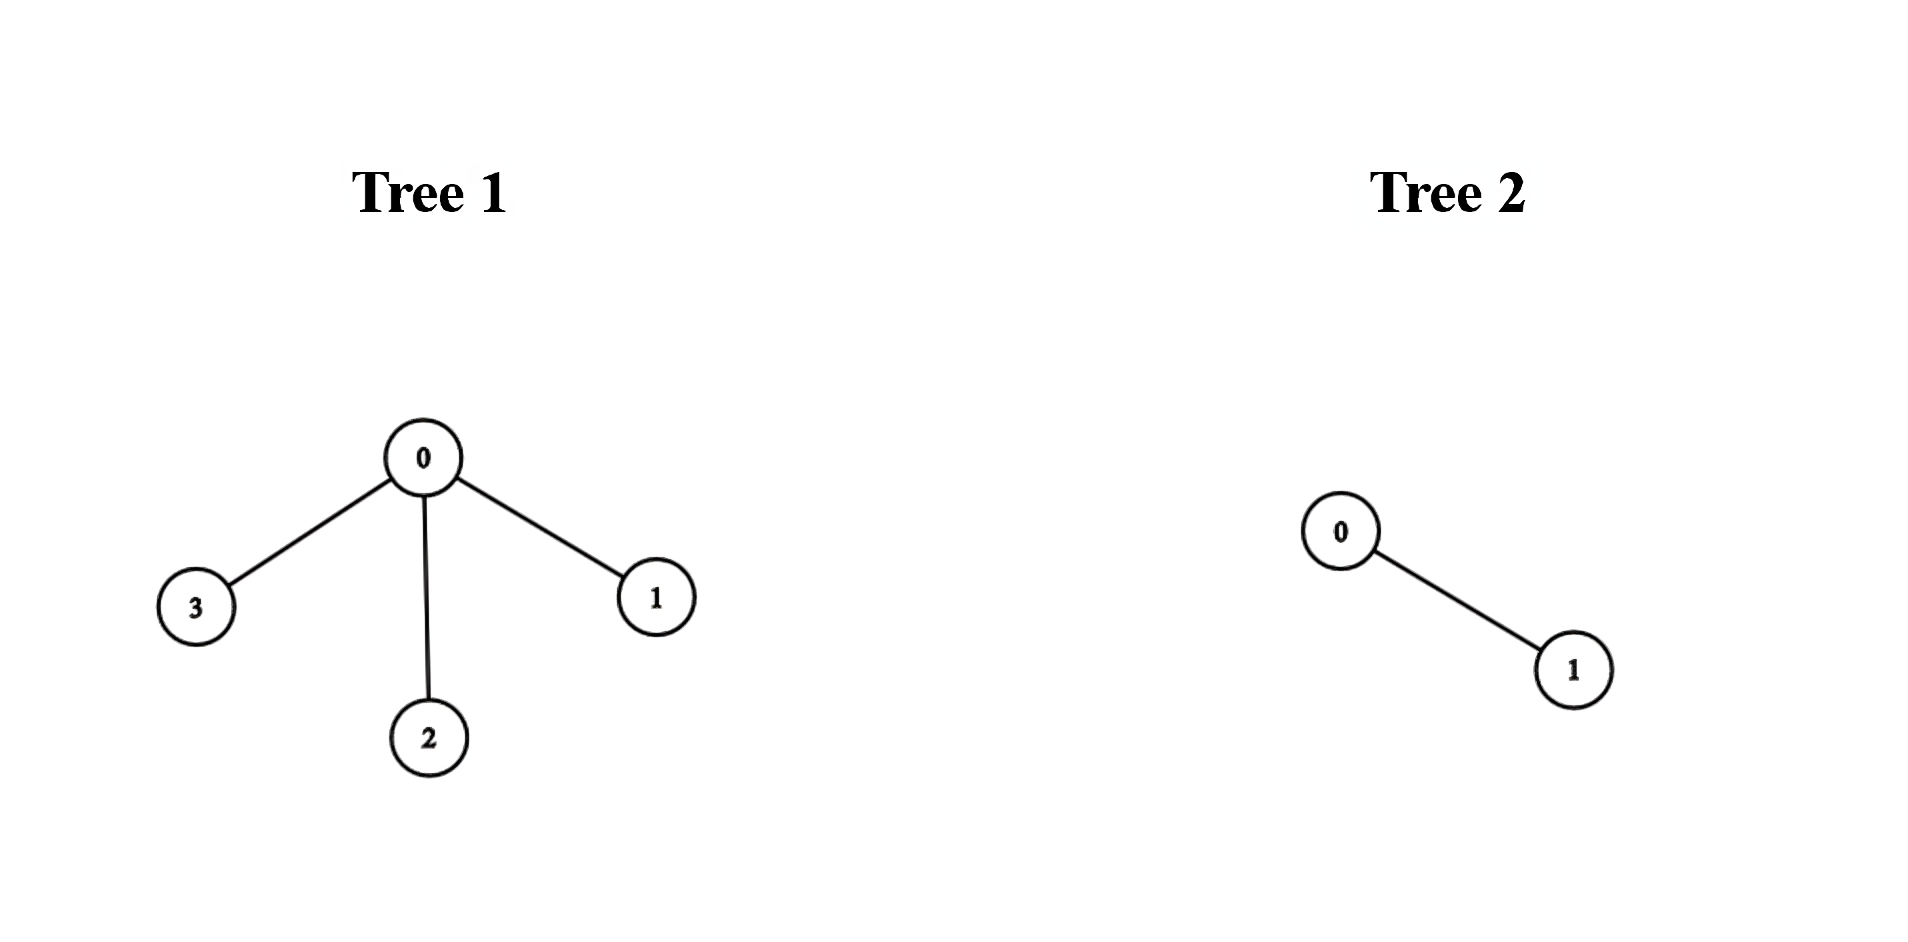

Input: edges1 = [[0,1],[0,2],[0,3]], edges2 = [[0,1]]

Output: 3

Explanation:

We can obtain a tree of diameter 3 by connecting node 0 from the first tree with any node from the second tree.

Example 2:

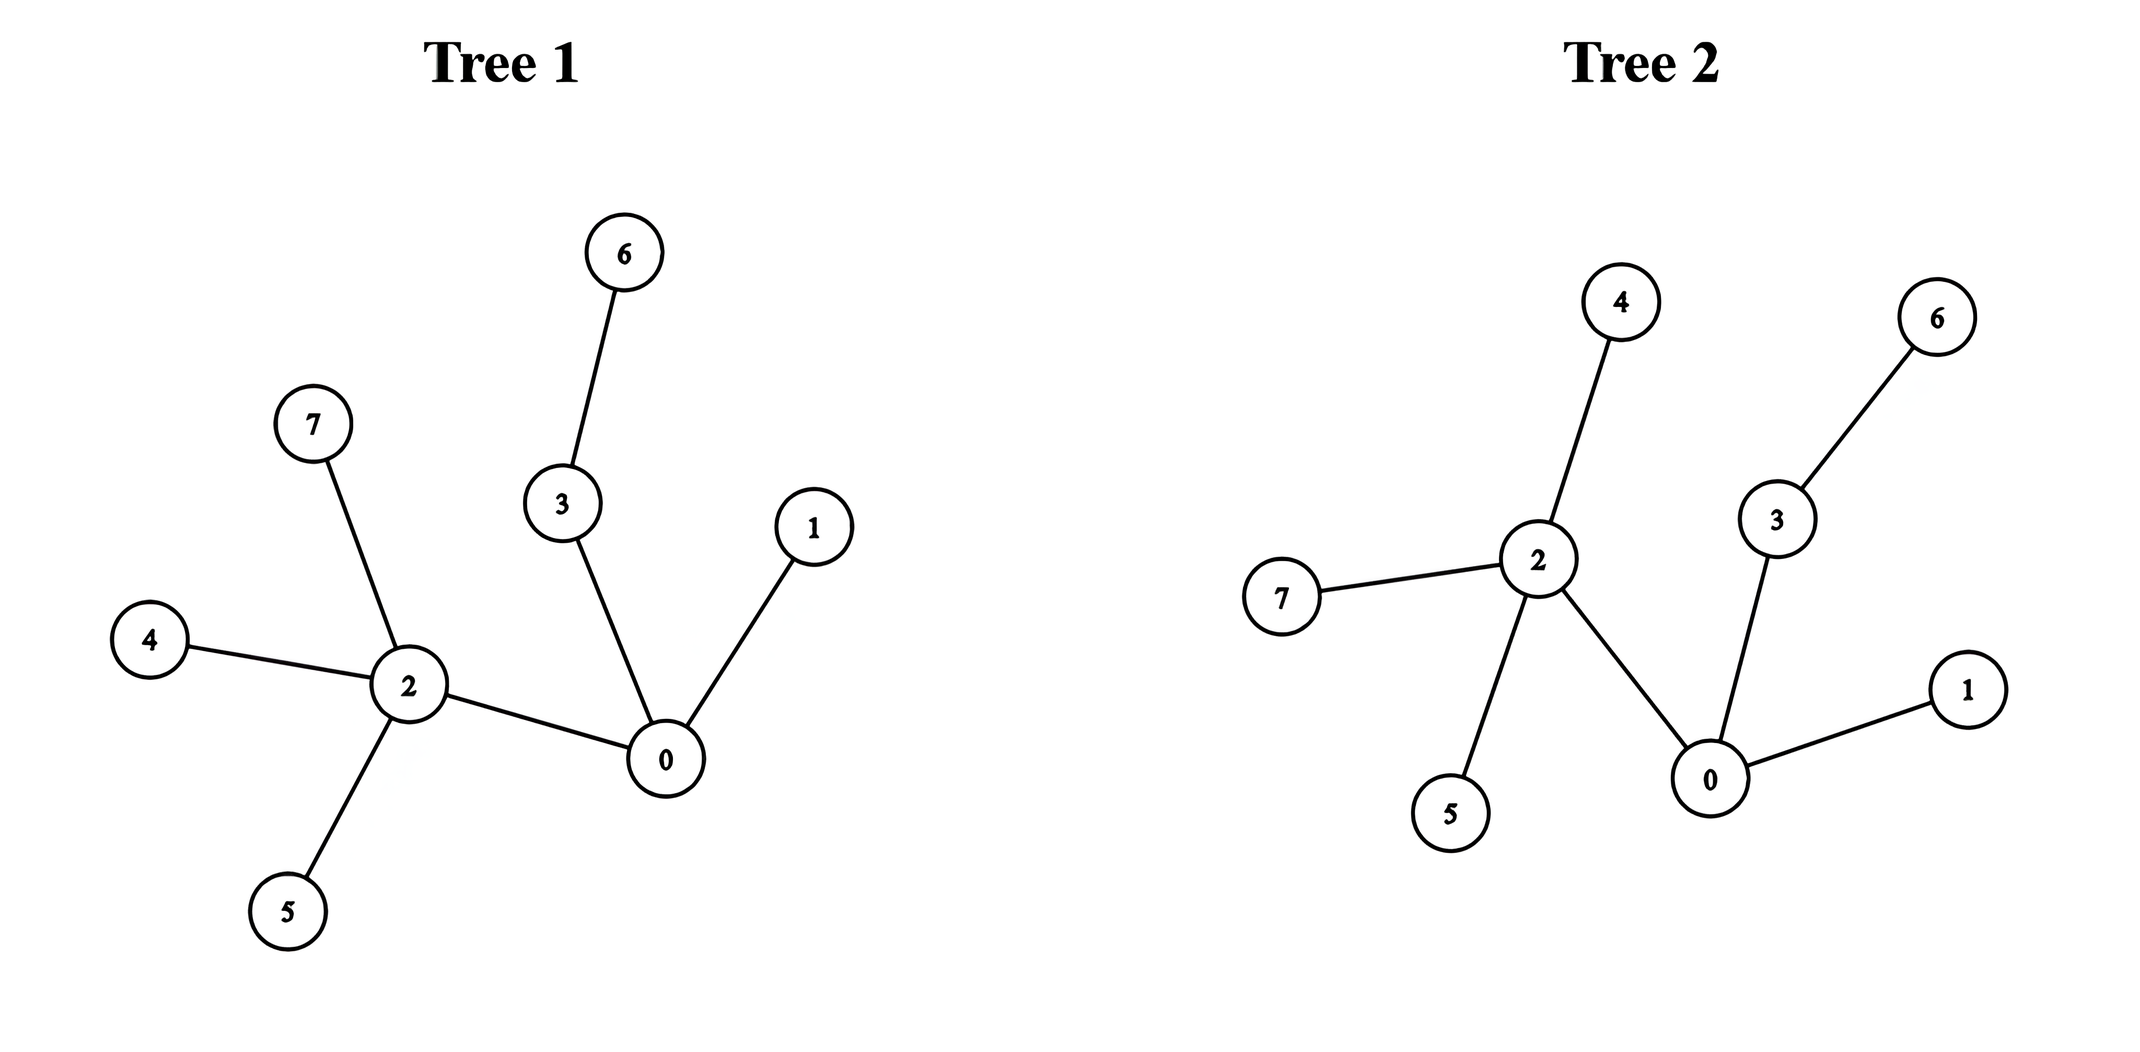

Input: edges1 = [[0,1],[0,2],[0,3],[2,4],[2,5],[3,6],[2,7]], edges2 = [[0,1],[0,2],[0,3],[2,4],[2,5],[3,6],[2,7]]

Output: 5

Explanation:

We can obtain a tree of diameter 5 by connecting node 0 from the first tree with node 0 from the second tree.

 

Constraints:

    1 <= n, m <= 105
    edges1.length == n - 1
    edges2.length == m - 1
    edges1[i].length == edges2[i].length == 2
    edges1[i] = [ai, bi]
    0 <= ai, bi < n
    edges2[i] = [ui, vi]
    0 <= ui, vi < m
    The input is generated such that edges1 and edges2 represent valid trees.



In [ ]:
class Solution:
    def minimumDiameterAfterMerge(self, edges1: List[List[int]], edges2: List[List[int]]) -> int:
        # Calculate the number of nodes for each tree
        n = len(edges1) + 1
        m = len(edges2) + 1

        # Build adjacency lists for both trees
        adj_list1 = self.build_adj_list(n, edges1)
        adj_list2 = self.build_adj_list(m, edges2)

        # Calculate the diameters of both trees
        diameter1 = self.find_diameter(n, adj_list1)
        diameter2 = self.find_diameter(m, adj_list2)

        # Calculate the longest path that spans across both trees
        combined_diameter = ceil(diameter1 / 2) + ceil(diameter2 / 2) + 1

        # Return the maximum of the three possibilities
        return max(diameter1, diameter2, combined_diameter)

    def build_adj_list(self, size, edges):
        adj_list = [[] for _ in range(size)]
        for edge in edges:
            adj_list[edge[0]].append(edge[1])
            adj_list[edge[1]].append(edge[0])
        return adj_list

    def find_diameter(self, n, adj_list):
        # First BFS to find the farthest node from an arbitrary node (e.g., 0)
        farthest_node, _ = self.find_farthest_node(n, adj_list, 0)

        # Second BFS to find the diameter starting from the farthest node
        _, diameter = self.find_farthest_node(n, adj_list, farthest_node)
        return diameter

    def find_farthest_node(self, n, adj_list, source_node):
        queue = deque([source_node])
        visited = [False] * n
        visited[source_node] = True

        maximum_distance = 0
        farthest_node = source_node

        while queue:
            for _ in range(len(queue)):
                current_node = queue.popleft()
                farthest_node = current_node

                for neighbor in adj_list[current_node]:
                    if not visited[neighbor]:
                        visited[neighbor] = True
                        queue.append(neighbor)

            if queue:
                maximum_distance += 1

        return farthest_node, maximum_distance